In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
dataset= pd.read_csv("/content/EastWestAirlines2.csv")

In [3]:
dataset.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
dataset.tail(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
# Removing unnecessory column
dataset=dataset.drop(['ID#'], axis=1)

In [6]:
dataset.shape

(3999, 11)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


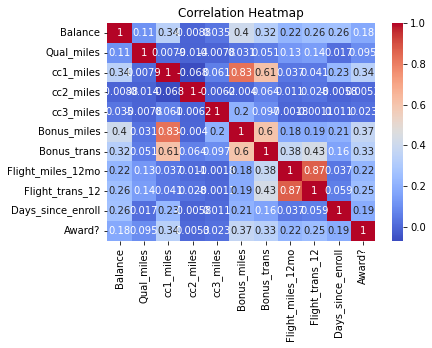

In [8]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='Balance', ylabel='Count'>

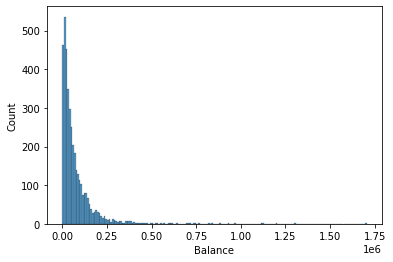

In [9]:
sns.histplot(data=dataset, x="Balance", shrink=0.999)

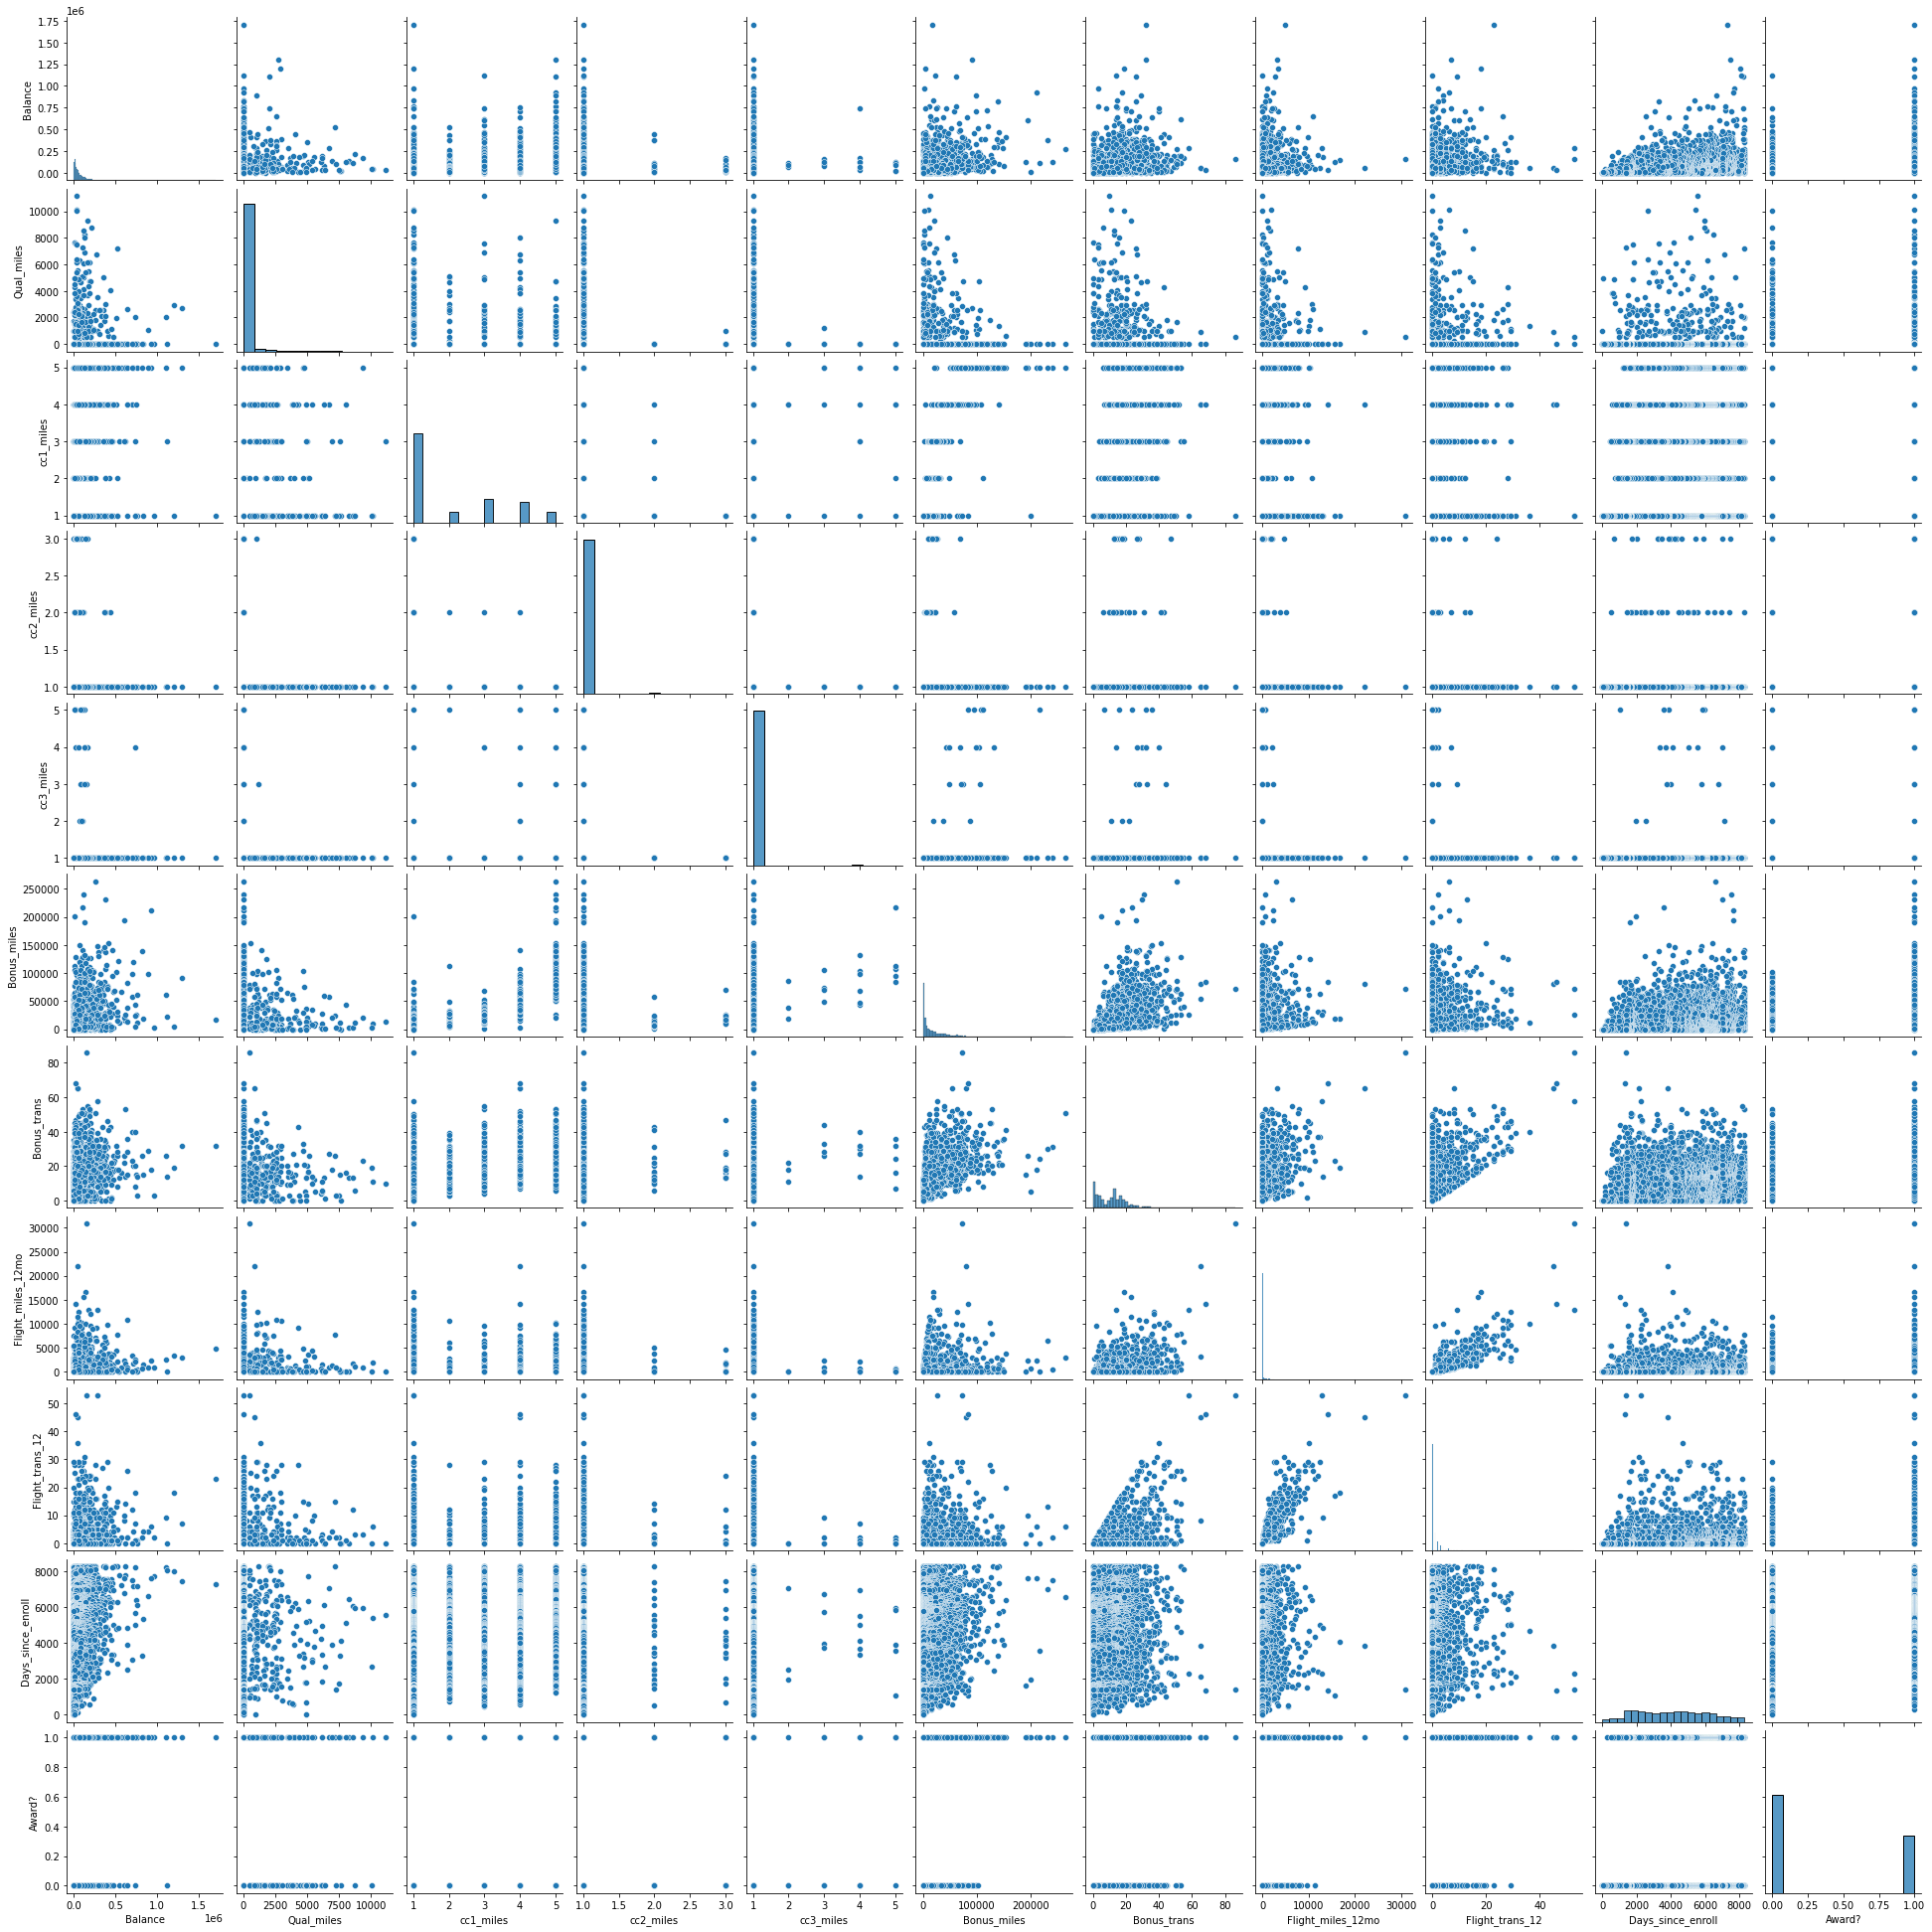

In [10]:
sns.pairplot(dataset)

In [11]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(dataset)

#Applying Hierarchical Clustering Algorithms

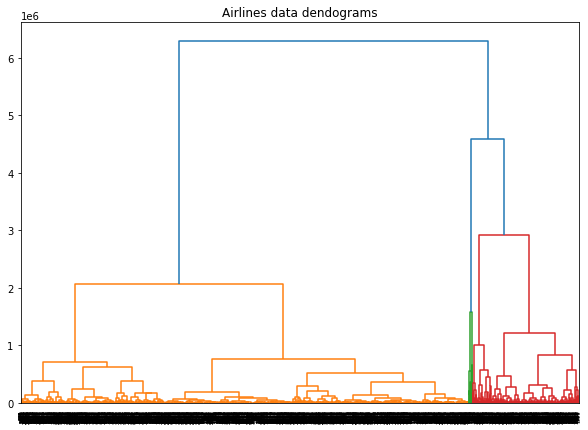

In [13]:
#creating Dendrograms
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Airlines data dendograms')
dendrogram=shc.dendrogram(shc.linkage(dataset,method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(dataset)
labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [15]:
# Compute the silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(dataset, labels)

print("Silhouette score:", score)

Silhouette score: 0.6507953123140028


In [21]:
y=pd.DataFrame(cluster.fit_predict(dataset),columns=['Assigned_clusters'])
y['Assigned_clusters'].value_counts()
y

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Assigned_clusters
0,1
1,1
2,1
3,1
4,1
...,...
3994,1
3995,1
3996,1
3997,1


In [22]:
# Adding clusters to dataset
newdataset=dataset.copy()
newdataset['Assigned_clusters']=cluster.labels_
newdataset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Assigned_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


<Figure size 1440x1440 with 0 Axes>

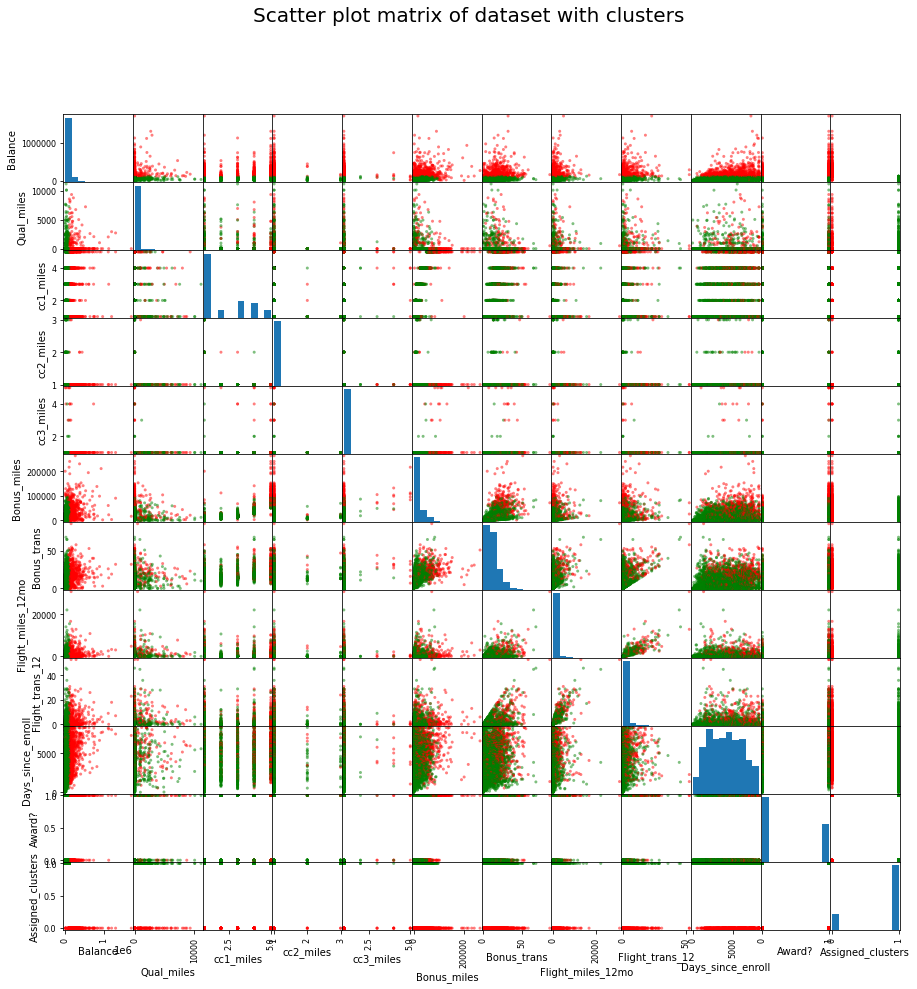

In [23]:
# create a scatter plot matrix with different colors for each cluster
plt.figure(figsize=(20, 20))
colors = ['red', 'green', 'blue'] # specify colors for each cluster
pd.plotting.scatter_matrix(newdataset, c=[colors[label] for label in cluster.labels_], figsize=(15, 15), diagonal='hist', alpha=0.5)
plt.suptitle('Scatter plot matrix of dataset with clusters', size=20)
plt.show()

#Applying K-Means Clustering Algorithms

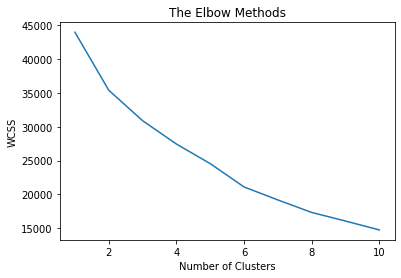

In [24]:
#FIND THE OPTIMAL NUMBER OF CLUSTERS using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
wcss

[43989.000000000015,
 35409.511452424376,
 30899.24682465222,
 27446.372456681347,
 24541.329582045757,
 21089.973628929638,
 19165.86145865565,
 17316.866446128264,
 16043.406242309495,
 14726.983322766802]

In [38]:
# Fitting evaluated clusters in the model

kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans = kmeans.fit_predict(dataset)
kmeans

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [39]:
score = silhouette_score(dataset, kmeans)

print("Silhouette score:", score)

Silhouette score: 0.5153976406355736


In [27]:
# Assign clusters to the data set
kmeansdataset=dataset.copy()
kmeansdataset['kmeansclusters']=kmeans
kmeansdataset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeansclusters
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


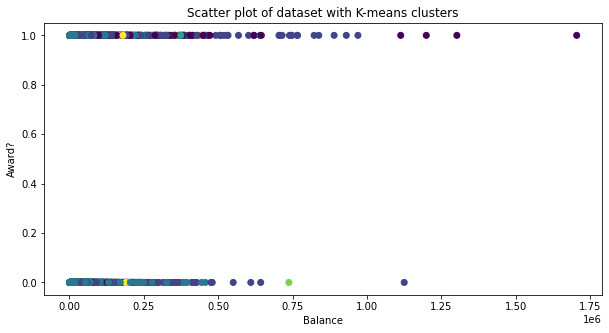

In [28]:
# plot scatter plot with different colors for each cluster
plt.figure(figsize=(10, 5))
plt.scatter(kmeansdataset['Balance'], kmeansdataset['Award?'], c=kmeans)
plt.title('Scatter plot of dataset with K-means clusters')
plt.xlabel('Balance')
plt.ylabel('Award?')
plt.show()

# Applying DBSCAN algorithm

In [30]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(dataset)
labels = db.labels_

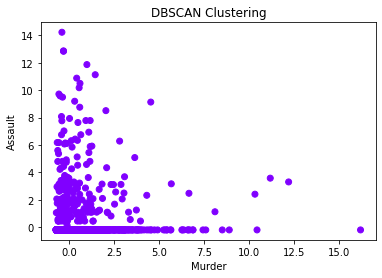

In [31]:
# Visualize clustering
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('DBSCAN Clustering')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


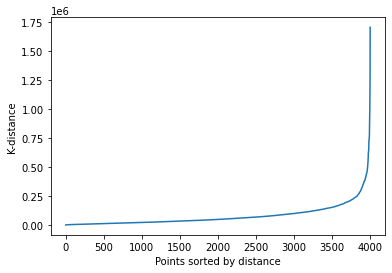

In [33]:
# Calculate k-distances
from sklearn.neighbors import NearestNeighbors
k = 4
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)
distances, indices = nn.kneighbors(dataset)
k_distances = distances[:, -1]

# Sort k-distances in ascending order
k_distances_sorted = sorted(k_distances, reverse=False)

# Plot k-distance graph
plt.plot(range(1, len(X)+1), k_distances_sorted)
plt.xlabel("Points sorted by distance")
plt.ylabel("K-distance")
plt.show()

In [41]:
# Determine epsilon value based on elbow point
eps = 2.5

# Run DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=k)
dbscan.fit(dataset)

# Print cluster labels and number of points in each cluster
print("Cluster labels:", dbscan.labels_)
print("Number of points in each cluster:", pd.Series(dbscan.labels_).value_counts().sort_index())

Cluster labels: [-1 -1 -1 ... -1 -1 -1]
Number of points in each cluster: -1    3999
dtype: int64


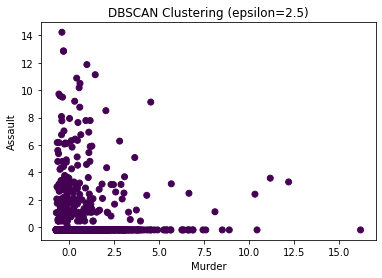

In [42]:
# Apply DBSCAN with epsilon=2.5 and min_samples=3
dbscan = DBSCAN(eps=2.5, min_samples=3)
clusters = dbscan.fit_predict(dataset)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('DBSCAN Clustering (epsilon=2.5)')
plt.show()